# **INTRODUCTION**

This Olympics dataset consists of different major athletic event in which thousands of competitors from all over the world compete in a range of events. Different Nations from all over the world compete and hence contains a lot of data. Using different Data Science and Machine Learning techniques which will be beneficial for different countries different players in their growth.

The following dataset contains information about olympic events that occurred between 2000 and 2012.

The dataset has a total of ten features. There are 8618 observations.

Players' names, ages, countries, medal types, and total medals earned are all included in the data collection.
The dataset also assume Madel won in group sports also as individual Medal for each player.

A single player can play many games.

Year - The year in which a certain olympic event took place.

Date Given - The date on which a sporting event will take place.

Same player can compete in a number of Olympic events.

# **AIM**

**Aim of this project is Basic Exploration of the Data as well as Data Cleaning for the betterment in the decision making in progess of tha players,countries,sports as well.**

we will check if the dataset contains any duplicate values as well as null values and we will be removing special character from the name as well as we will also perform diferent data visualization techniques and also check for skewness. 

# **ABOUT DATASET**


**The different variables in the data set are of following data type:** 

NAME -->         QUALITATIVE TYPE NOMINAL DATA  

AGE-->           QUALITATIVE TYPE NOMINAL DATA  

YEAR-->          QUNATITATIVE TYPE DISCRETE DATA

COUNTRY -->      QUALITATIVE TYPE NOMINAL DATA  

DATE-->          QUALITATIVE TYPE ORDINAL DATA


SPORTS-->        QUALITATIVE TYPE NOMINAL DATA 

GOLD_MEDAL-->    QUNATITATIVE TYPE DISCRETE DATA

SILVER_MEDAL-->  QUNATITATIVE TYPE DISCRETE DATA

BRONE_MEDAL -->  QUNATITATIVE TYPE DISCRETE DATA

TOTAL_MEDAL-->   QUNATITATIVE TYPE DISCRETE DATA

**Import Dependecies**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotiing
import seaborn as sns #plotiing
import missingno as msno # missing value
%matplotlib inline
plt.style.use('dark_background')

**Loading data**

In [ ]:
file_location ="/content/olympix_data_organized_with_header (1) (1) (1).csv"# filepath
df=pd.read_csv(file_location)# reading data

In [ ]:
df.shape# shape of data

(8618, 10)

**Identify variables**

In [ ]:
df.dtypes# data types

name             object
age             float64
country          object
year              int64
Date_Given       object
sports           object
gold_medal        int64
silver_medal      int64
brone_medal       int64
total_medal       int64
dtype: object

**Changing the data types of the features.**

In [ ]:
df['Date_Given']=df['Date_Given'].str.replace('/','-')#inconsistent date so bring in single format
df['Date_Given'] = df['Date_Given'].astype('datetime64[ns]')# changing to appriopate data types
df['year'] = df['year'].astype('category')# changing to appriopate data types
df['country'] = df['country'].astype('category')# changing to appriopate data types
df['sports'] = df['sports'].astype('category')# changing to appriopate data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          8613 non-null   object        
 1   age           8613 non-null   float64       
 2   country       8618 non-null   category      
 3   year          8618 non-null   category      
 4   Date_Given    8618 non-null   datetime64[ns]
 5   sports        8618 non-null   category      
 6   gold_medal    8618 non-null   int64         
 7   silver_medal  8618 non-null   int64         
 8   brone_medal   8618 non-null   int64         
 9   total_medal   8618 non-null   int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 503.4+ KB


# **DATA EXPLORATION**

**Duplicate And NUll Values in DataSet**

In [ ]:
print(" Missing value in dataset")
df.isnull().sum()#sum of missing value

 Missing value in dataset


name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

In [ ]:
print("Duplicated value in dataset are :")
df.duplicated().sum()#sum of duplicated value

Duplicated value in dataset are :


3

In [ ]:
df.index[df.isnull().any(axis=1)]  #indexes which contains null value

Int64Index([1428, 1429, 1430, 4485, 4486], dtype='int64')

In [ ]:
#Indexes at which missing values are present
df[1428:1431]


,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1428,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
1429,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
1430,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1


In [ ]:
df[4485:4487]

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
4485,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1
4486,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1


In [ ]:
df=df.dropna()# removing null values

In [ ]:
df=df.drop_duplicates()# drping duplicate values

AS we can see here that only 2 columns have 5 missing value in the entire dataset i.e name and the age dataset.
As comapred to 8618 rows 5 rows would not make much of a difference has deleting them. And also since if don't have name of the player that data is not so much relevent hence removing it. 


Dropping this row is effective in two way.First it leads to decrease in bias by droping duplicate value and also handling of missing value.

In [ ]:
df.duplicated().any()

False

**As we can see there are no such dulicate values in the dataset hence we are good to go**

# **Removing special characters from the name column**

In [ ]:
#remove special characters from the name column
df.name = df.name.replace('[!,@,#,$,%,^,&,*,]', '')
df

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10-01-2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10-01-2000,Archery,0,0,1,1


# **Data visualization**

**Dividing DataSet Based on Winter and Summer (for exploration purpose)**

In [ ]:

df1=df.copy(deep=True)# making duplicated copy
df1['month'] = df1['Date_Given'].dt.month# extracting month because winter ooration purpose)lympic occur on februry 
df1['season'] = np.where(df1['month']== 2, 'winter', 'summer')# new column based on condition
summer=df1[df1['season']=='summer']# filter dataset
winter=df1[df1['season']=='winter']# filter dataset
def summer_olympic(year):# filter dataset baed on year
    return summer[summer['year']==year]

**Distribution of Summer And Winter Olympics.**

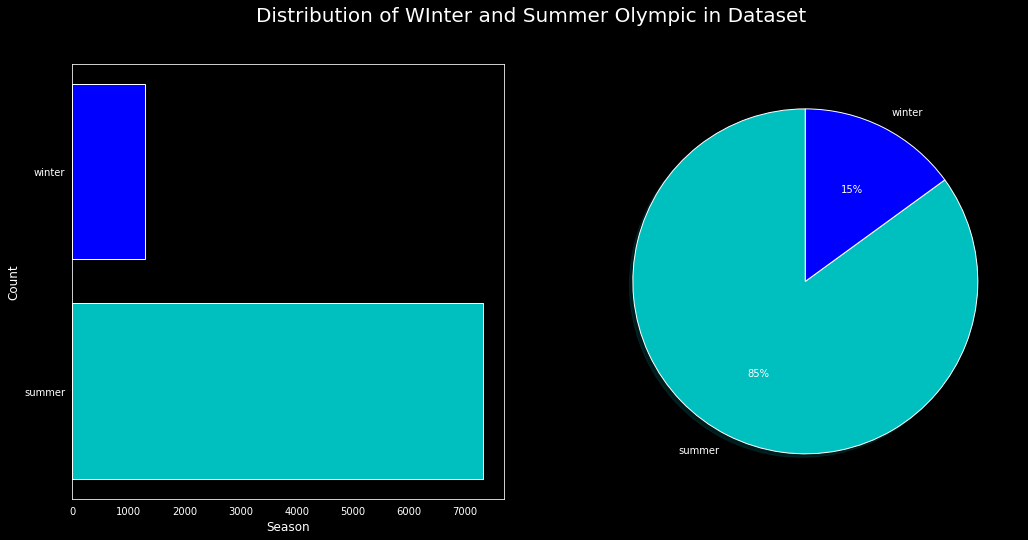

In [ ]:
total_cont=df1['season'].value_counts()
label=total_cont.index
values=total_cont.values.flatten()
#pie plot
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)
axs[0].set_ylabel( "Count" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Season" , size = 12 )
plt.style.use('dark_background')
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0))
fig.suptitle('Distribution of WInter and Summer Olympic in Dataset',).set_size(20)
axs[0].grid(False)


plt.style.use('dark_background')
plt.show()

AS we can see in the above pie chart the no of sports played is highest in the summer as compared to winter.Around 85% of the sports are played in the summer which is approx 7100 where as only 15% of the sports are played in the winter which is approx 1500.

**Distribution of dataset Year wise**

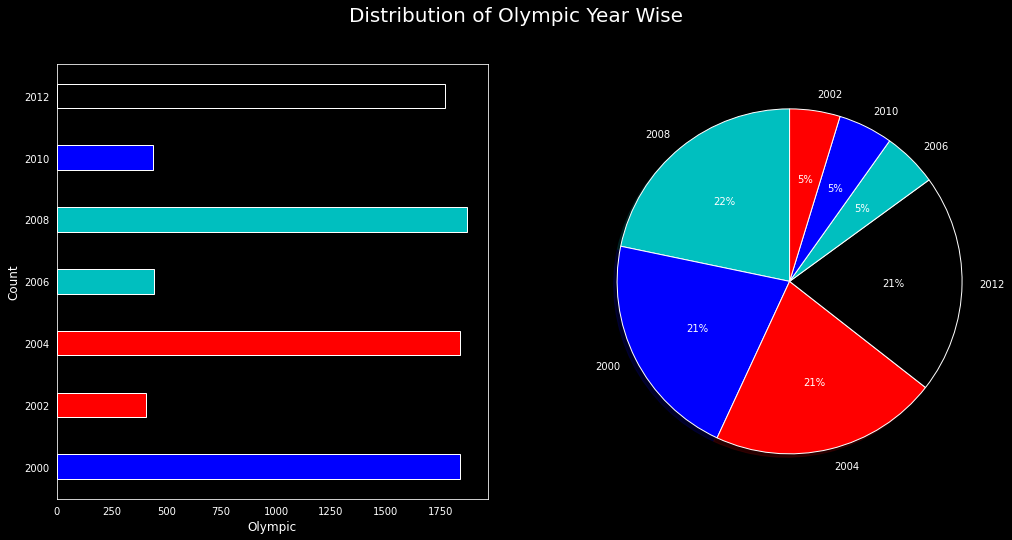

In [ ]:
# distribution of player in each olympic
total_cont=df1.year.value_counts()
label=total_cont.index
values=total_cont.values.flatten()
#pie plot
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)
axs[0].set_ylabel( "Count" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Olympic" , size = 12 )
plt.style.use('dark_background')
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0,0,0,0,0,0,0))
fig.suptitle('Distribution of Olympic Year Wise',).set_size(20)
axs[0].grid(False)

plt.style.use('dark_background')
plt.show()

The most no of olympic sports are played in the year 2008 with 22% follwed by year 2000,2004,2012 each with 21% of the total.

**NO of Players and Total Medal**

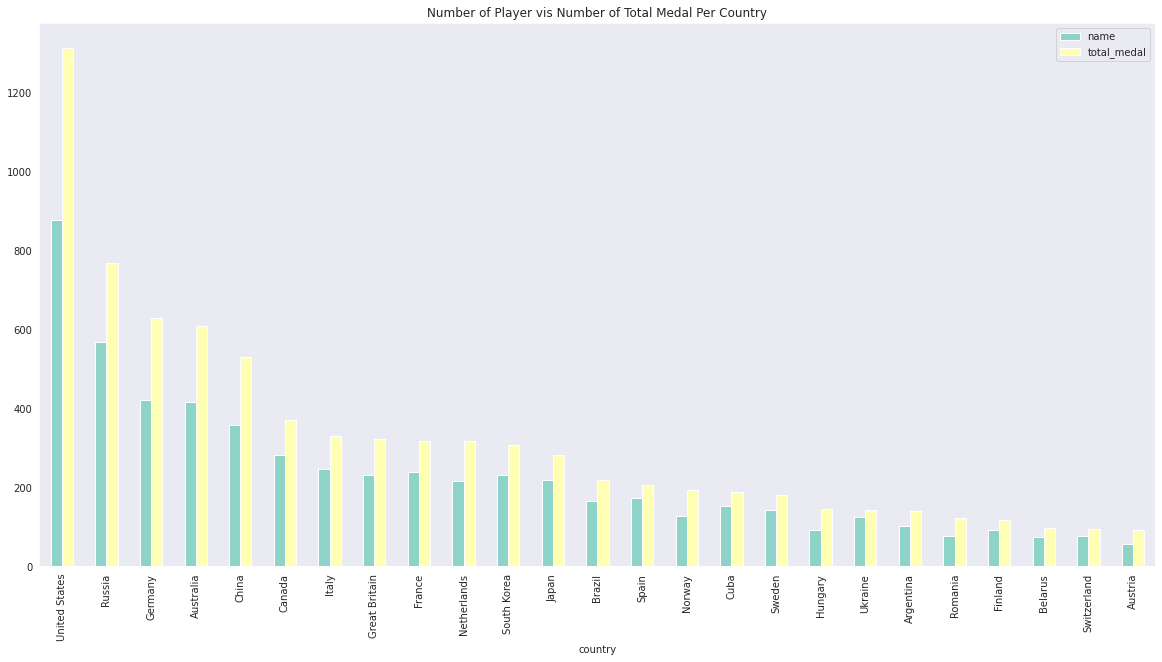

In [ ]:
df1.groupby('country').agg({'name':'nunique','total_medal':'sum'}).sort_values(by='total_medal',ascending=False)[:25].plot(kind='bar',figsize=(20,10),title='Number of Player vis Number of Total Medal Per Country')
sns.set_style("dark")

United States has the highest no of medals as well as the highest no of players particpated followed by Russia and Germany and at last we have Switzerland and Austria.

**Distribution of sports in the Dataset**

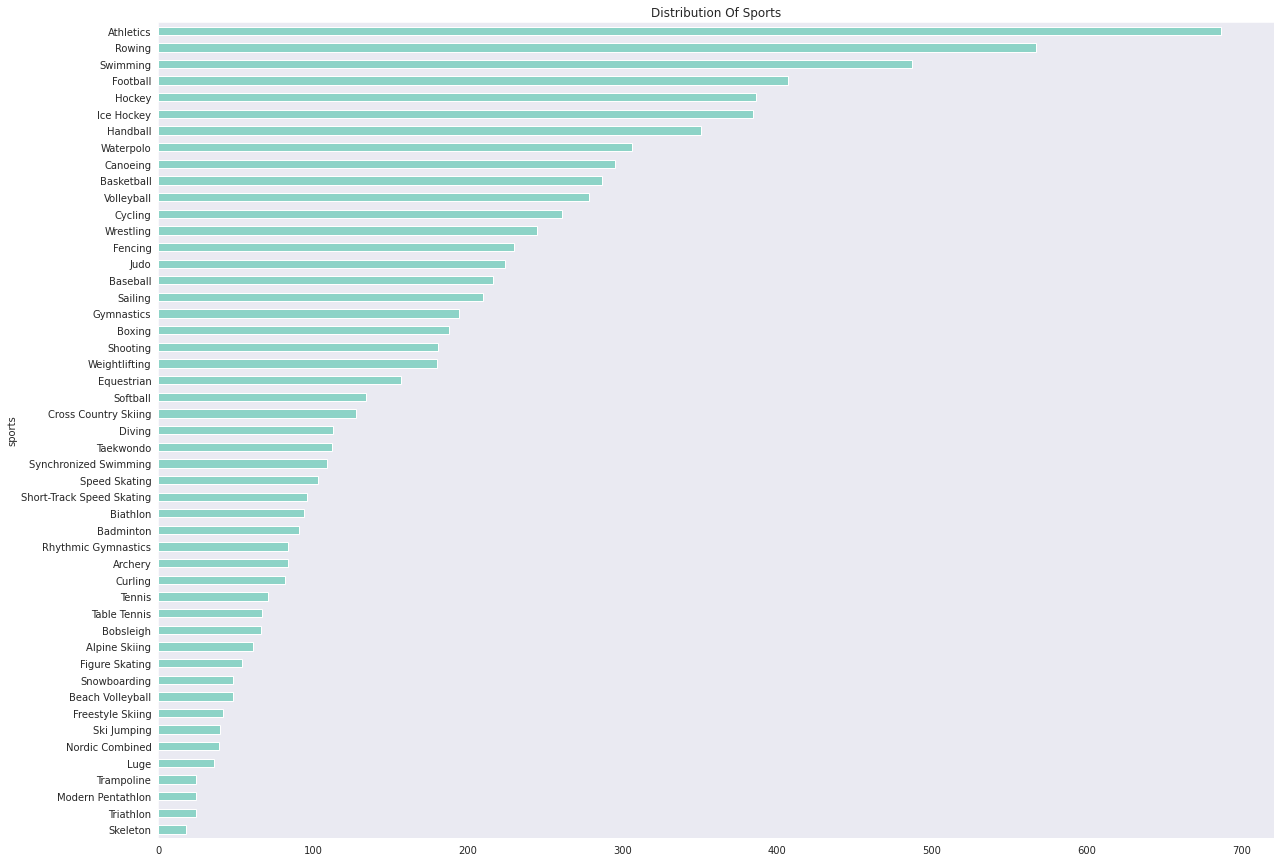

In [ ]:
df1.groupby(['sports']).size().sort_values(ascending=True).plot(kind = "barh",figsize=(20, 15),title='Distribution Of Sports')# horizontal bar plot
sns.set_style("dark")

The most played sports among all others in the dataset is Athletics followed by Rowing and then Swimming and at last we have Skeleton.

# **Numerical measures on column**

In [ ]:
#Statistical Summary of Each Features
df.describe().round(0)# statistical summary of nummerical varriable and rounding of float values to zero

,age,gold_medal,silver_medal,brone_medal,total_medal
count,8613.0,8613.0,8613.0,8613.0,8613.0
mean,26.0,0.0,0.0,0.0,1.0
std,5.0,1.0,1.0,1.0,0.0
min,15.0,0.0,0.0,0.0,1.0
25%,23.0,0.0,0.0,0.0,1.0
50%,26.0,0.0,0.0,0.0,1.0
75%,29.0,1.0,1.0,1.0,1.0
max,61.0,8.0,3.0,3.0,8.0


# **SKEWNESS OF AGE IN THE DATASET**

Text(0, 0.5, 'Count')

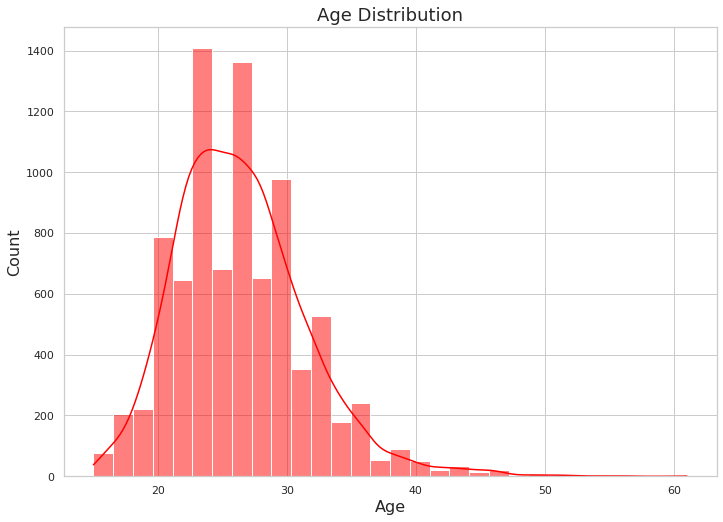

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})# figure size
sns.set_theme(style="whitegrid")
sns.histplot(df['age'], kde=True, color='red', bins=30)# histogram plot
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)

In [ ]:

# skewness along the index axis
df.age.skew(axis = 0, skipna = True)

0.8590070668484233

Text(0.5, 0.98, 'Distribtion of Age in different Year')

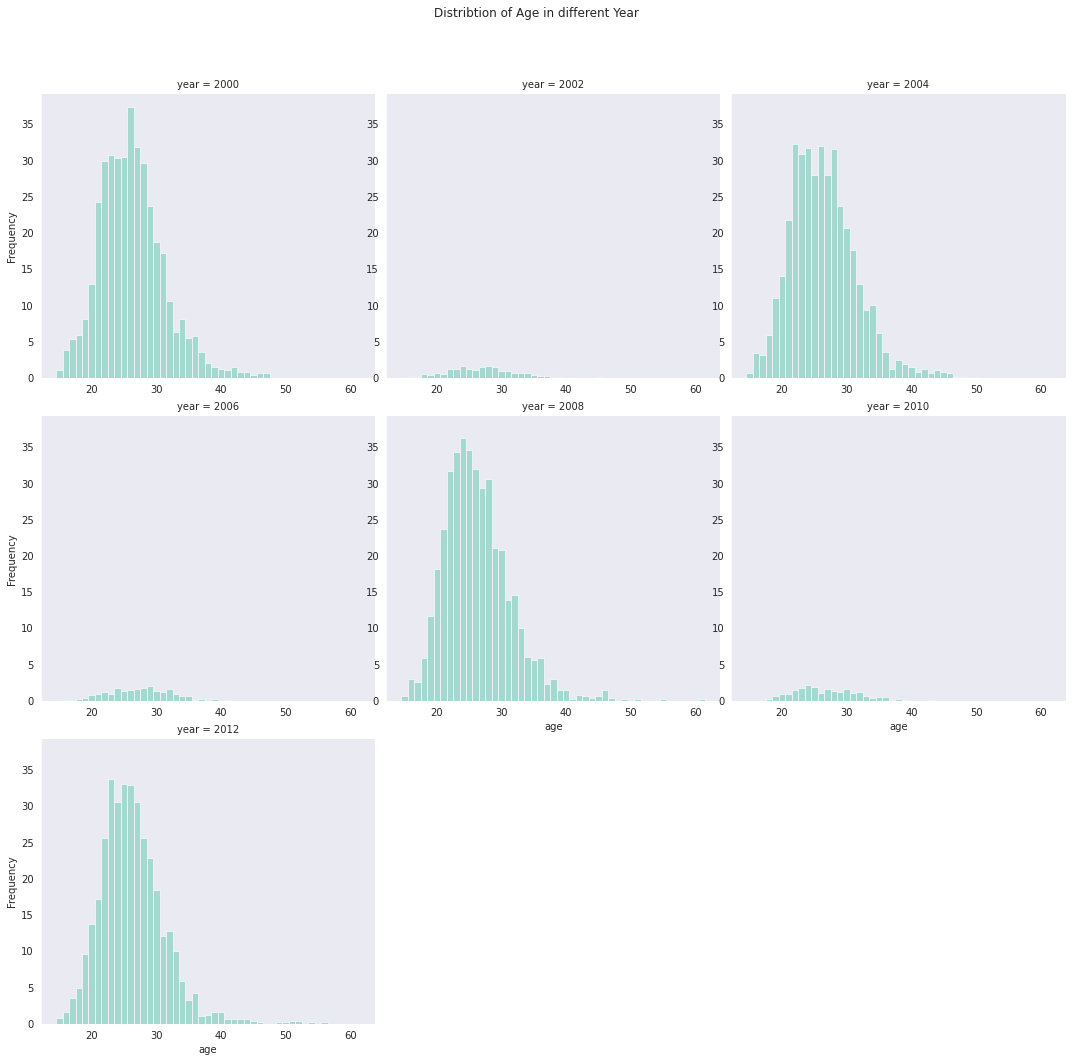

In [ ]:
# histogram and density plot 
ax=sns.displot(
    df, x="age", col="year",
    binwidth=3, height=5, facet_kws=dict(margin_titles=True),col_wrap=3,discrete=True,stat="frequency"
)
for axis in ax.axes.flat:
    axis.tick_params(labelleft=True)
    axis.tick_params(labelbottom=True)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure
ax.fig.suptitle('Distribtion of Age in different Year')

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.**Here the skewness value for age is 0.8590070668484233 hence we can say that it is(positively) moderatly skewed.or we can say its right skewed.**

**Transformation on Age Column**

Text(0, 0.5, 'Count')

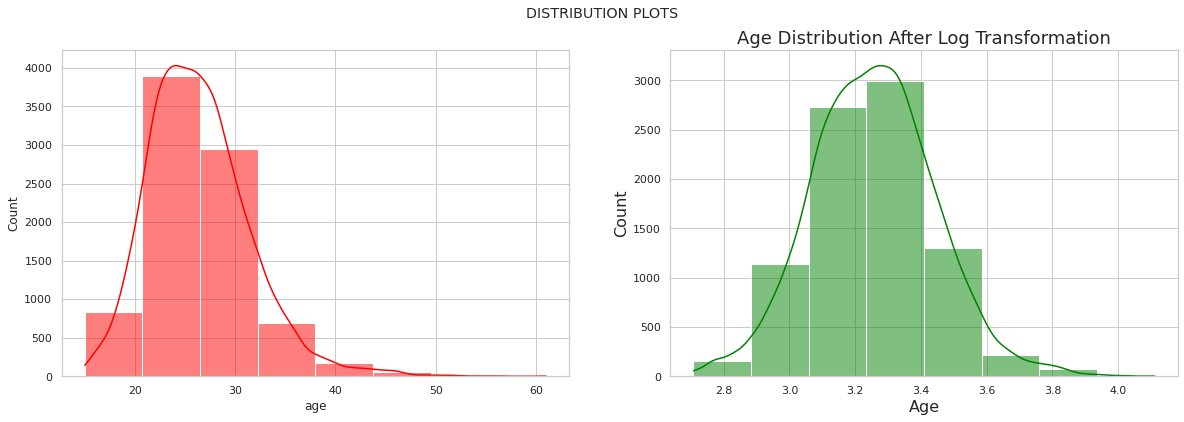

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
plt.suptitle('DISTRIBUTION PLOTS')
# Histogram Plot for distribution and skewness
sns.histplot(df['age'], kde=True, color='red', bins=8,ax=ax[0]) #Age
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.histplot(np.log(df['age']), kde=True, color='green', bins=8,ax=ax[1]) #log transformed Age 
plt.title('Age Distribution After Log Transformation', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)

**Here by performing log transformation we can see the skewness has been reduced from 0.8590070668484233 to 0.1548420625269884.**

# **The top 10 countries with the gold medal, then the top10 countries with the silver medal, then the bronze medal and the total medal.**

In [ ]:
#grouping the dataset according to country and the goldmedal 
df.groupby('country')['gold_medal'].sum().nlargest(10)



country
United States    552
China            234
Russia           234
Germany          223
Canada           168
Australia        163
Great Britain    124
South Korea      110
France           108
Netherlands      101
Name: gold_medal, dtype: int64

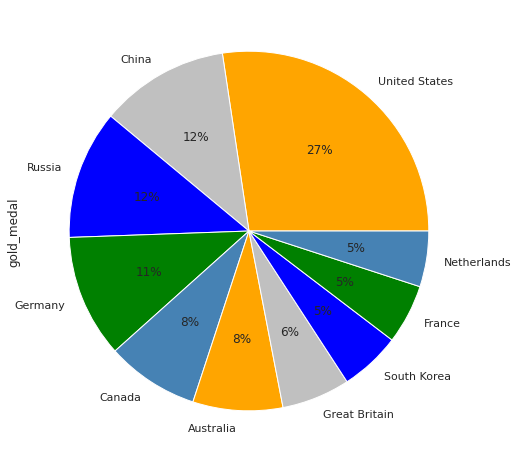

In [ ]:
# Defining colors for the pie chart
colors = ['orange', 'silver', 'blue','green','steelblue']
  
# Plotting the pie chart for above dataframe
df.groupby('country')['gold_medal'].sum().nlargest(10).plot(
    kind='pie', y='votes_of_each_class', 
  autopct='%1.0f%%', colors=colors)

Here we can see that the country with highest no of gold medal is United States with 552 gold medal and the country Netherland is in 10th position with 101 gold medals.

In [ ]:
#grouping the dataset according to country and the silver medal.
df.groupby('country')['silver_medal'].sum().nlargest(10)

country
United States    440
Australia        226
Russia           221
Germany          183
China            156
Netherlands      135
Spain            116
Japan            112
France           107
Italy            103
Name: silver_medal, dtype: int64

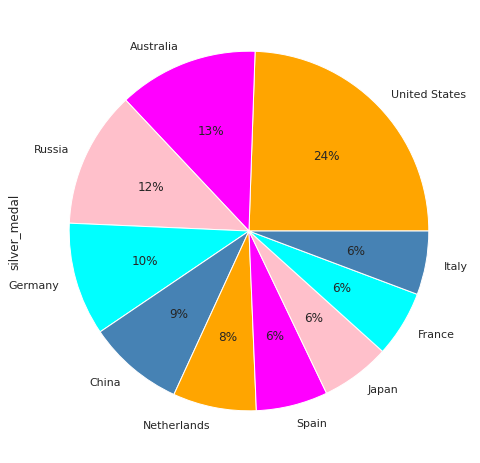

In [ ]:
# Defining colors for the pie chart
colors = ['orange', 'magenta', 'pink','cyan','steelblue']
  
# Plotting the pie chart for above dataframe
df.groupby('country')['silver_medal'].sum().nlargest(10).plot(
    kind='pie', y='votes_of_each_class', 
  autopct='%1.0f%%', colors=colors)

Here we can see that the country with highest no of silver medal is United States with 440 silver medal and the country Italy is in 10th position with 103 silver medals.

In [ ]:
#grouping the dataset according to country and the bronze medal
df.groupby('country')['brone_medal'].sum().nlargest(10)

country
United States    320
Russia           313
Germany          223
Australia        220
Italy            142
China            140
Japan            113
South Korea      105
Canada           104
France           103
Name: brone_medal, dtype: int64

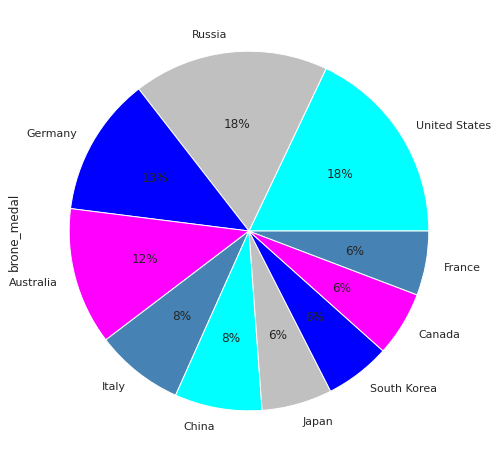

In [ ]:
# Defining colors for the pie chart
colors = ['cyan', 'silver', 'blue','magenta','steelblue']
  
# Plotting the pie chart for above dataframe
df.groupby('country')['brone_medal'].sum().nlargest(10).plot(
    kind='pie', y='votes_of_each_class', 
  autopct='%1.0f%%', colors=colors)

Here we can see that the country with highest no of bronze medal is United States with 320 bronze medal and the country France is in 10th position with 103 bronze medals.

In [ ]:
#grouping the datset according to country and the total medal
df.groupby('country')['total_medal'].sum().nlargest(10)

country
United States    1312
Russia            768
Germany           629
Australia         609
China             530
Canada            370
Italy             331
Great Britain     322
France            318
Netherlands       318
Name: total_medal, dtype: int64

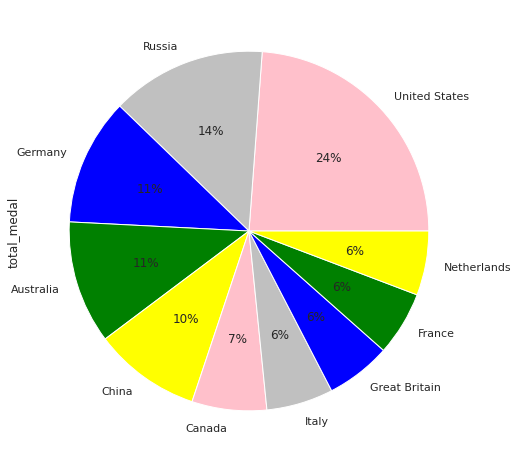

In [ ]:
# Defining colors for the pie chart
colors = ['pink', 'silver', 'blue','green','yellow']
  
# Plotting the pie chart for above dataframe
df.groupby('country')['total_medal'].sum().nlargest(10).plot(
    kind='pie', y='votes_of_each_class', 
  autopct='%1.0f%%', colors=colors)

Here we can see that the country with highest no of total medal is United States with 1312 total medal and the country Netherland is in 10th position with 318 total medals.

# **CONCLUSION**

* There are 5 missing value in the name column as well as 5 missing value in the age column 

* The total duplicated values in the dataset are 3

* United States has the highest no of medals as well as the highest no of players particpated followed by Russia and Germany and at last we have Switzerland and Austria.

* The most played sports among all others in the dataset is Athletics followed by Rowing and then Swimming and at last we have Skeleton.

* The most no of olympic sports are played in the year 2008 with 22% follwed by year 2000,2004,2012 each with 21% of the total.

* No of sports played is highest in the summer as compared to winter.Around 85% of the sports are played in the summer which is approx 7100 where as only 15% of the sports are played in the winter which is approx 1500.

* The skewness value for age is 0.8590070668484233 hence we can say that it is(positively) moderatly skewed.or we can say its right skewed.and  by performing log transformation we can see the skewness has been reduced from 0.8590070668484233 to 0.1548420625269884.

